## The Data



#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors 

# Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Data

In [2]:
df = pd.read_csv('dataset/kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# null value count 

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


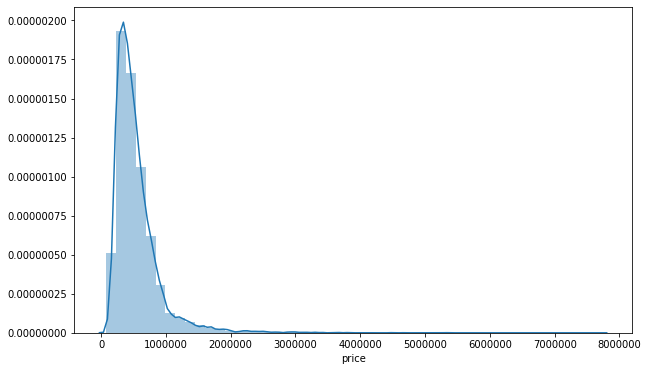

In [6]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

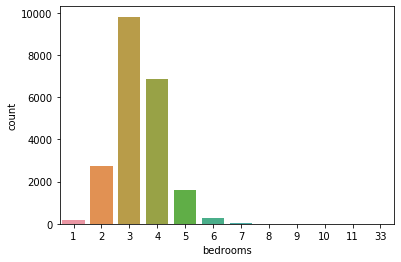

In [7]:
sns.countplot(df['bedrooms'])

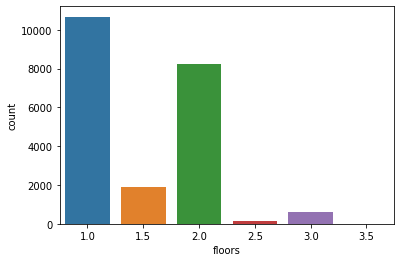

In [8]:
sns.countplot(df['floors'])

In [9]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

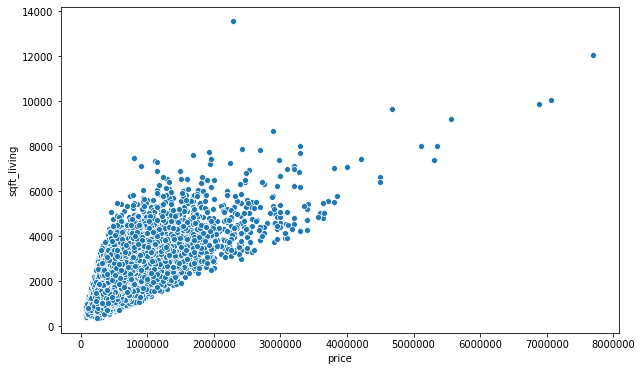

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='sqft_living',data=df)

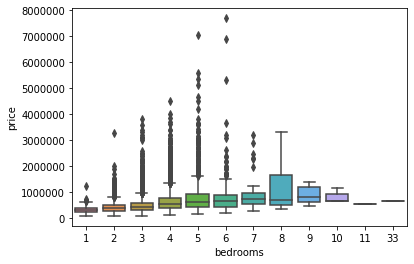

In [11]:
sns.boxplot(x='bedrooms',y='price',data=df)

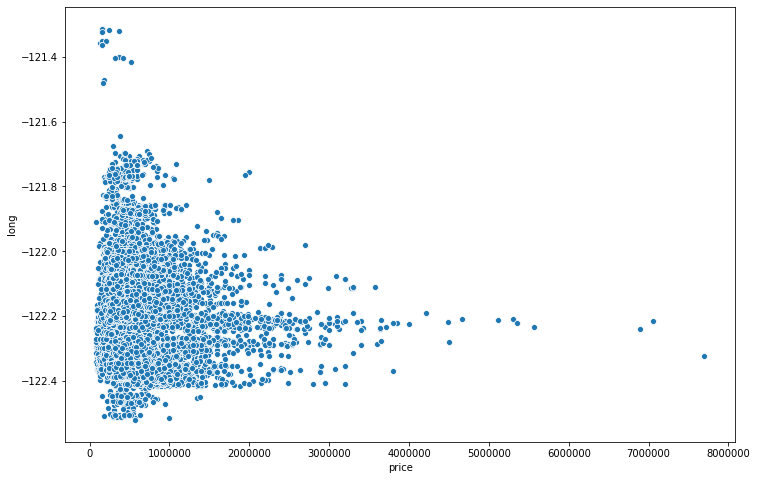

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

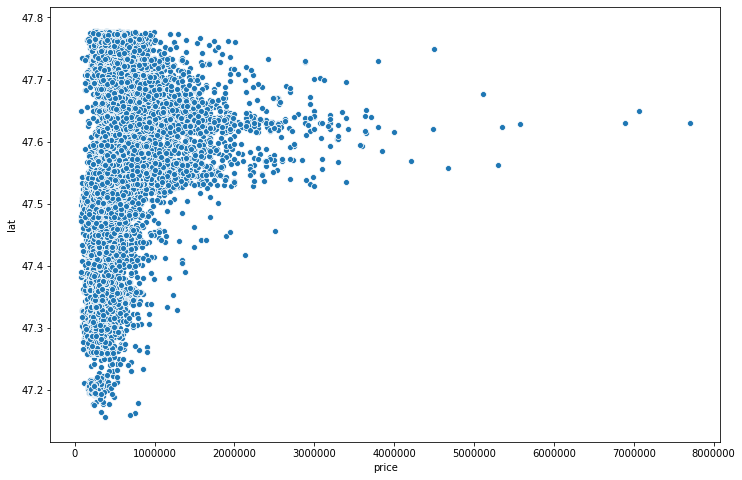

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

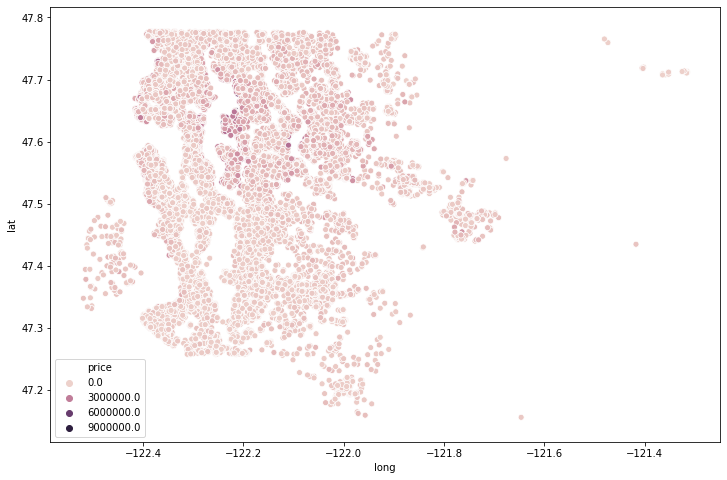

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [15]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [16]:
len(df)*(0.01)

215.97

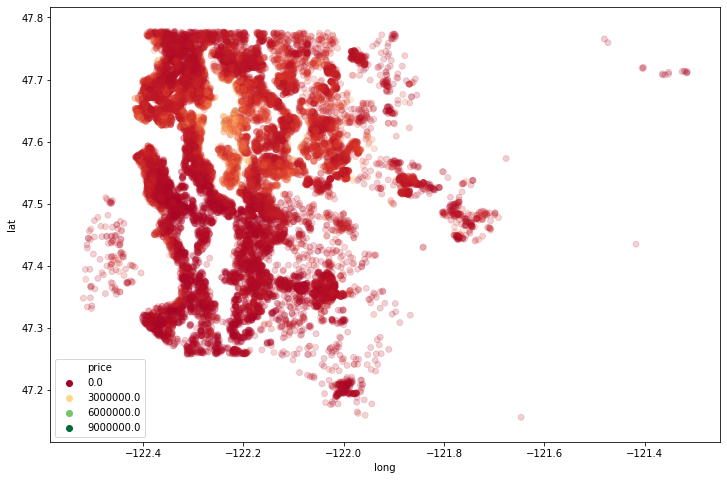

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=df,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

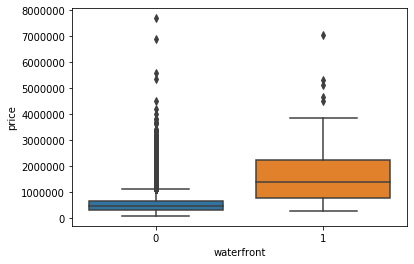

In [18]:
sns.boxplot(x='waterfront',y='price',data=df)

In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [21]:
df = df.drop('id',axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
df['date'] = pd.to_datetime(df['date'])

In [23]:
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

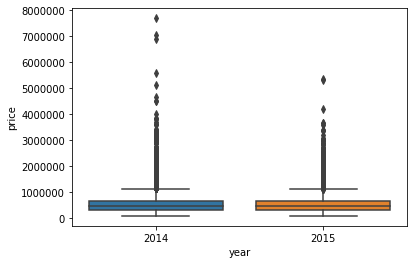

In [24]:
sns.boxplot(x='year',y='price',data=df)

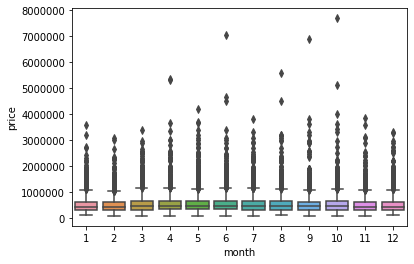

In [25]:
sns.boxplot(x='month',y='price',data=df)

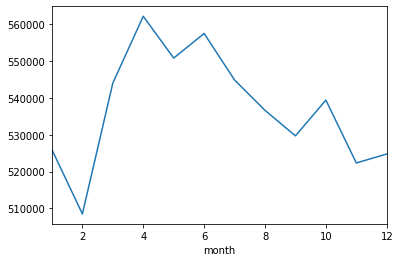

In [26]:
df.groupby('month').mean()['price'].plot()

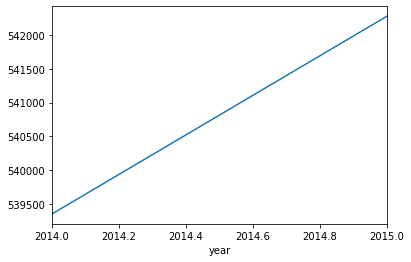

In [27]:
df.groupby('year').mean()['price'].plot()

In [28]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [29]:
df = df.drop(['zipcode','date'],axis=1)

In [30]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [31]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [32]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [33]:
X = df.drop('price',axis=1)
y = df['price']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

# Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
X_train= scaler.fit_transform(X_train)

In [39]:
X_test = scaler.transform(X_test)

In [40]:
X_train.shape

(15117, 19)

In [41]:
X_test.shape

(6480, 19)

# Creating a Model

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [43]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [44]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 3s 182us/sample - loss: 430235365830.3885 - val_loss: 418886984792.4938
Epoch 2/400
15117/15117 [==============================] - 1s 44us/sample - loss: 428799791319.4078 - val_loss: 413862601735.5852
Epoch 3/400
15117/15117 [==============================] - 0s 33us/sample - loss: 408463602400.1799 - val_loss: 366830975891.2790
Epoch 4/400
15117/15117 [==============================] - 0s 30us/sample - loss: 309006789287.4152 - val_loss: 212999782602.2716
Epoch 5/400
15117/15117 [==============================] - 1s 36us/sample - loss: 148924014263.6047 - val_loss: 100677958719.2099
Epoch 6/400
15117/15117 [==============================] - 0s 32us/sample - loss: 100153256672.8573 - val_loss: 95108718055.9802
Epoch 7/400
15117/15117 [==============================] - 0s 32us/sample - loss: 97466213354.5269 - val_loss: 93415457779.3580
Epoch 8/400
15117/15117 [==================

15117/15117 [==============================] - 0s 28us/sample - loss: 37662771055.5819 - val_loss: 36382093458.6469
Epoch 65/400
15117/15117 [==============================] - 0s 29us/sample - loss: 37484590952.7404 - val_loss: 36268478231.3877
Epoch 66/400
15117/15117 [==============================] - 0s 26us/sample - loss: 37286471412.4337 - val_loss: 36009215256.6519
Epoch 67/400
15117/15117 [==============================] - 0s 27us/sample - loss: 37140504888.7478 - val_loss: 35843289507.7136
Epoch 68/400
15117/15117 [==============================] - 0s 28us/sample - loss: 36988274741.2423 - val_loss: 35684846655.2099
Epoch 69/400
15117/15117 [==============================] - 0s 26us/sample - loss: 36771780675.0609 - val_loss: 35605695455.1309
Epoch 70/400
15117/15117 [==============================] - 0s 26us/sample - loss: 36699474044.2321 - val_loss: 35412824038.7160
Epoch 71/400
15117/15117 [==============================] - 0s 26us/sample - loss: 36550521547.7230 - val_loss

15117/15117 [==============================] - 0s 28us/sample - loss: 32813170020.0664 - val_loss: 31256893475.3975
Epoch 128/400
15117/15117 [==============================] - 0s 25us/sample - loss: 32732137313.6278 - val_loss: 31417518661.5309
Epoch 129/400
15117/15117 [==============================] - 0s 25us/sample - loss: 32751395576.8367 - val_loss: 31210917008.1185
Epoch 130/400
15117/15117 [==============================] - 0s 27us/sample - loss: 32645225710.9808 - val_loss: 31118057138.2519
Epoch 131/400
15117/15117 [==============================] - 0s 26us/sample - loss: 32657704402.1750 - val_loss: 31084218888.8494
Epoch 132/400
15117/15117 [==============================] - 0s 26us/sample - loss: 32579760062.0229 - val_loss: 31034643524.2667
Epoch 133/400
15117/15117 [==============================] - 0s 26us/sample - loss: 32585252973.8715 - val_loss: 31021912332.0099
Epoch 134/400
15117/15117 [==============================] - 0s 27us/sample - loss: 32513566006.7156 - v

15117/15117 [==============================] - 0s 26us/sample - loss: 31221747048.2323 - val_loss: 29405976793.4420
Epoch 191/400
15117/15117 [==============================] - 0s 26us/sample - loss: 31168085639.6460 - val_loss: 29356134020.7407
Epoch 192/400
15117/15117 [==============================] - 0s 27us/sample - loss: 31169573189.1439 - val_loss: 29343413093.7679
Epoch 193/400
15117/15117 [==============================] - 0s 28us/sample - loss: 31177556159.5639 - val_loss: 29313263873.8963
Epoch 194/400
15117/15117 [==============================] - 0s 26us/sample - loss: 31115967790.3161 - val_loss: 29321319113.0074
Epoch 195/400
15117/15117 [==============================] - 0s 27us/sample - loss: 31128545324.1654 - val_loss: 29293593551.9605
Epoch 196/400
15117/15117 [==============================] - 0s 27us/sample - loss: 31067553663.2972 - val_loss: 29410579458.5284
Epoch 197/400
15117/15117 [==============================] - 0s 27us/sample - loss: 31077612979.7605 - v

15117/15117 [==============================] - 0s 27us/sample - loss: 30264028432.7822 - val_loss: 28251002045.6296
Epoch 254/400
15117/15117 [==============================] - 0s 26us/sample - loss: 30221339551.2697 - val_loss: 28241439584.7111
Epoch 255/400
15117/15117 [==============================] - 0s 27us/sample - loss: 30182381417.7564 - val_loss: 28181695920.3556
Epoch 256/400
15117/15117 [==============================] - 0s 27us/sample - loss: 30190413790.9437 - val_loss: 28194529082.7852
Epoch 257/400
15117/15117 [==============================] - 0s 26us/sample - loss: 30179480090.7228 - val_loss: 28161201589.4123
Epoch 258/400
15117/15117 [==============================] - 0s 27us/sample - loss: 30161609966.5066 - val_loss: 28226584024.8099
Epoch 259/400
15117/15117 [==============================] - 0s 27us/sample - loss: 30189173333.4519 - val_loss: 28177520452.8988
Epoch 260/400
15117/15117 [==============================] - 0s 27us/sample - loss: 30093585012.4083 - v

15117/15117 [==============================] - 0s 27us/sample - loss: 29423682251.4859 - val_loss: 27231077454.3802
Epoch 317/400
15117/15117 [==============================] - 0s 28us/sample - loss: 29416629073.9803 - val_loss: 27189912613.9259
Epoch 318/400
15117/15117 [==============================] - 0s 26us/sample - loss: 29419245987.2324 - val_loss: 27166309393.6988
Epoch 319/400
15117/15117 [==============================] - 0s 26us/sample - loss: 29355148113.0320 - val_loss: 27204179411.7531
Epoch 320/400
15117/15117 [==============================] - 0s 28us/sample - loss: 29381285239.2702 - val_loss: 27144745182.4988
Epoch 321/400
15117/15117 [==============================] - 0s 26us/sample - loss: 29365006803.5298 - val_loss: 27129182637.8272
Epoch 322/400
15117/15117 [==============================] - 0s 27us/sample - loss: 29387986257.3368 - val_loss: 27079367348.7802
Epoch 323/400
15117/15117 [==============================] - 0s 27us/sample - loss: 29341346958.1150 - v

15117/15117 [==============================] - 0s 28us/sample - loss: 28739717652.0505 - val_loss: 26347936628.9383
Epoch 380/400
15117/15117 [==============================] - 0s 26us/sample - loss: 28711822093.1582 - val_loss: 26384500892.7605
Epoch 381/400
15117/15117 [==============================] - 0s 26us/sample - loss: 28703078307.1985 - val_loss: 26330475654.0049
Epoch 382/400
15117/15117 [==============================] - 0s 29us/sample - loss: 28684256264.5350 - val_loss: 26430645387.0617
Epoch 383/400
15117/15117 [==============================] - 0s 29us/sample - loss: 28691010176.8044 - val_loss: 26348858436.2667
Epoch 384/400
15117/15117 [==============================] - 0s 28us/sample - loss: 28717828974.2949 - val_loss: 26314394833.8568
Epoch 385/400
15117/15117 [==============================] - 0s 28us/sample - loss: 28677372392.0545 - val_loss: 26321378711.0716
Epoch 386/400
15117/15117 [==============================] - 0s 30us/sample - loss: 28643740675.6917 - v

In [45]:
losses = pd.DataFrame(model.history.history)

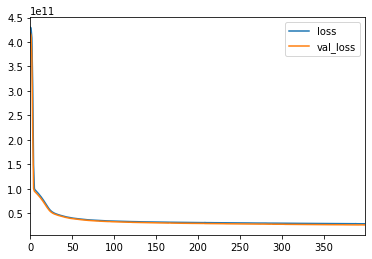

In [46]:
losses.plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [48]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [49]:
predictions = model.predict(X_test)

In [50]:
mean_absolute_error(y_test,predictions)

99337.19240692515

In [51]:
np.sqrt(mean_squared_error(y_test,predictions))

161907.2775981251

In [52]:
explained_variance_score(y_test,predictions)

0.8029124694549747

In [53]:
df['price'].mean()

540296.5735055795

In [54]:
df['price'].median()

450000.0

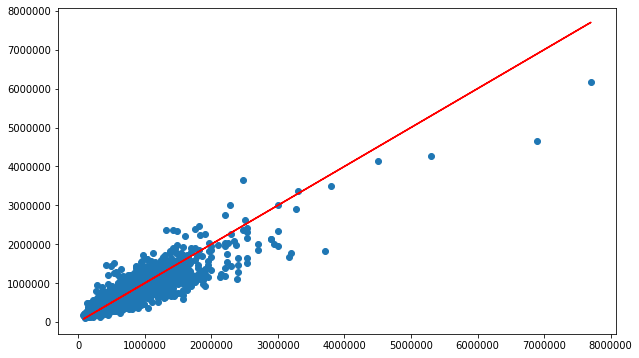

In [62]:
plt.figure(figsize=(10,6))
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [56]:
errors = y_test.values.reshape(6480, 1) - predictions

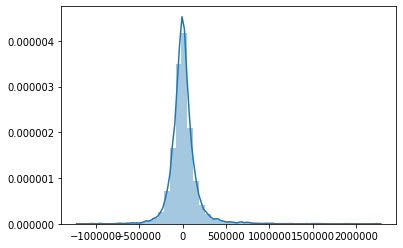

In [57]:
sns.distplot(errors)

In [58]:
single_house = df.drop('price',axis=1).iloc[0]

In [59]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [60]:
model.predict(single_house)

array([[274285.16]], dtype=float32)

In [61]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64